In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)


In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('A_Z Handwritten Data.csv')

In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.rename(columns={'0':'label'},inplace=True)

In [7]:
df.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [9]:
df['label'].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: label, dtype: int64

In [10]:
df.shape

(372450, 785)

In [11]:
letter_x=df.drop('label',axis=1)

In [12]:
df

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
letter_x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
letter_y=df['label']

In [15]:
from keras.datasets import mnist

In [16]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [17]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [18]:
letter_y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [19]:
train_x.shape

(60000, 28, 28)

In [20]:
letter_x=letter_x.values

In [21]:
len(letter_x[0])

784

In [22]:
letter_x.shape

(372450, 784)

In [23]:
len(letter_x)

372450

In [24]:
letter_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
digit_data=np.concatenate((train_x,test_x))

In [26]:
digit_target=np.concatenate((train_y,test_y))

In [27]:
digit_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
print(len(digit_data[0][0]))
print(len(digit_data[0]))

28
28


In [29]:
digit_data.shape

(70000, 28, 28)

In [30]:
set(digit_target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
n=len(digit_target)

In [32]:
digit_target.shape

(70000,)

In [33]:
for i in range(n):
    digit_target[i]+=26

In [34]:
set(digit_target)

{26, 27, 28, 29, 30, 31, 32, 33, 34, 35}

In [35]:
letter_x.shape

(372450, 784)

In [36]:
data=[]
for ft in letter_x:
    imz=np.reshape(ft,(28,28,1))
    data.append(imz)

In [37]:
letter_data=np.array(data,dtype=np.float32)
letter_target=letter_y

In [38]:
letter_data.shape

(372450, 28, 28, 1)

In [39]:
digit_data.shape

(70000, 28, 28)

In [40]:
digit_data=np.reshape(digit_data,(70000,28,28,1))

In [41]:
digit_data.shape

(70000, 28, 28, 1)

In [42]:
letter_target.shape

(372450,)

In [43]:
digit_target.shape

(70000,)

In [44]:
data=np.concatenate((digit_data,letter_data))

In [45]:
data.shape

(442450, 28, 28, 1)

In [46]:
print(len(data[0]))
print(len(data[0][0]))

28
28


In [47]:
target=np.concatenate((digit_target,letter_target))

In [48]:
target.shape

(442450,)

In [49]:
set(target)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35}

In [50]:
import sklearn
from sklearn.utils import shuffle

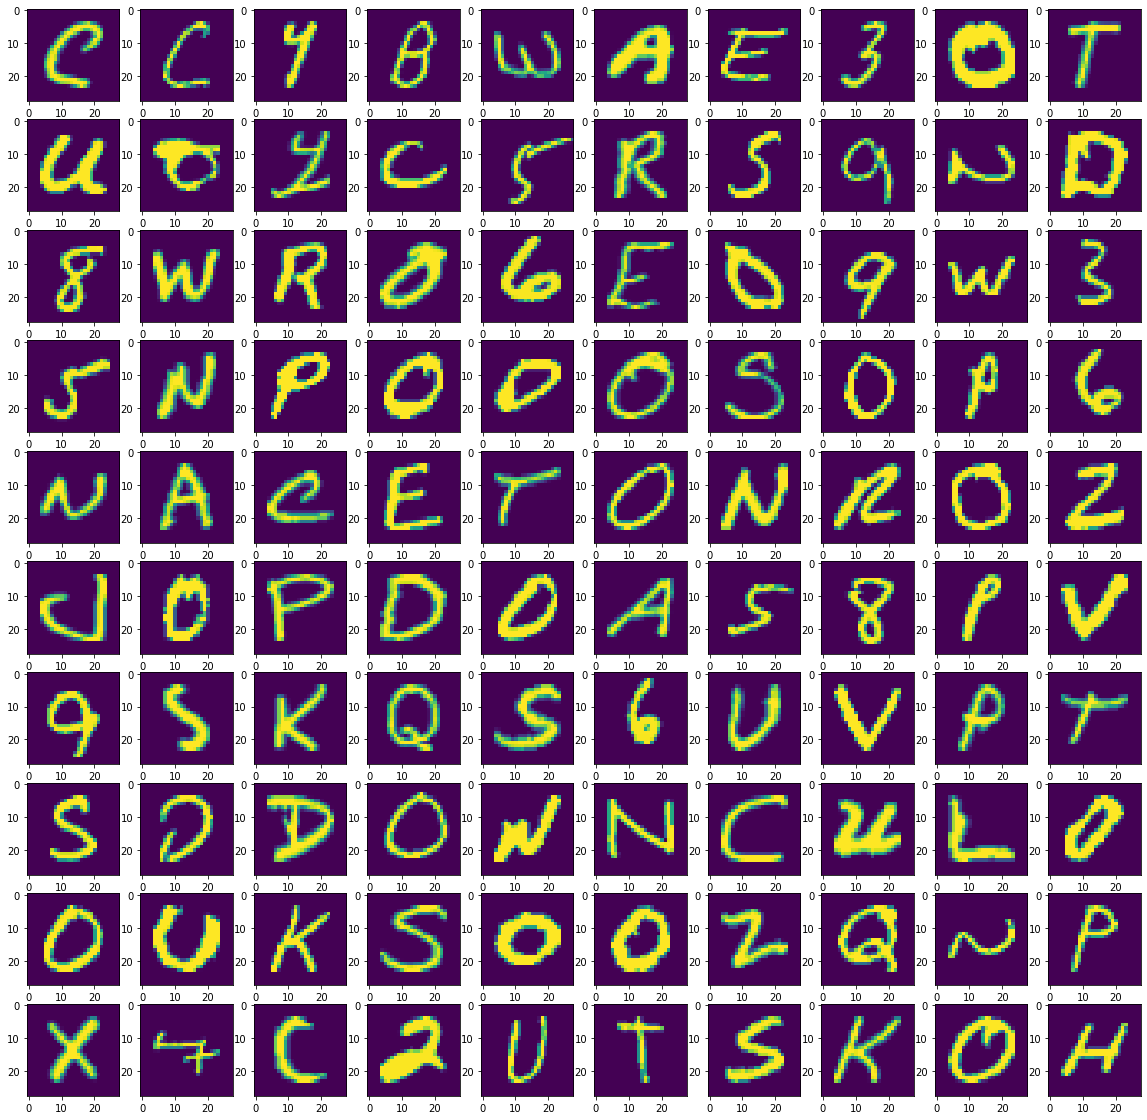

In [51]:
sd=shuffle(data)
plt.figure(figsize=(20,20))
row=10
col=10
for i in range(row*col):
    plt.subplot(col,row,i+1)
    plt.imshow(sd[i].reshape(28,28))
plt.show()

In [52]:
data=data/255

In [53]:
data.shape

(442450, 28, 28, 1)

In [54]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(data,target,test_size=0.2)

In [55]:
train_data.shape

(353960, 28, 28, 1)

In [56]:
test_data.shape

(88490, 28, 28, 1)

In [57]:
from tensorflow.keras import datasets,layers,models

In [58]:
cnn=models.Sequential([
    ##cnn
    layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense layrers
    
    layers.Flatten(),
    layers.Dense(70,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(36,activation='softmax')
])

In [59]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        1810      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 70)                1

In [60]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [61]:
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

In [62]:
history=cnn.fit(train_data,train_labels,epochs=2,callbacks=[tb_callback])

Epoch 1/2
11062/11062 [==============================] - 144s 13ms/step - loss: 0.2823 - accuracy: 0.9195
Epoch 2/2
11062/11062 [==============================] - 151s 14ms/step - loss: 0.1297 - accuracy: 0.9625


In [63]:
cnn.evaluate(test_data,test_labels)

2766/2766 [==============================] - 16s 6ms/step - loss: 0.1424 - accuracy: 0.9581


[0.14244778454303741, 0.9580517411231995]

In [64]:
y_pred=cnn.predict(test_data)

2766/2766 [==============================] - 13s 5ms/step


In [65]:
one=test_data[0]


In [66]:
one

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [67]:
q = cnn.predict(test_data[0][None,...])

1/1 [==============================] - 0s 26ms/step


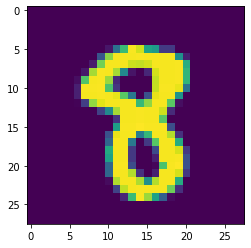

In [68]:
plt.imshow(test_data[0])

In [69]:
np.argmax(q)

34

In [70]:
np.argmax(q)

34

In [71]:
np.argmax(y_pred[0])

34

In [72]:
test_labels[0]

34

In [73]:
from sklearn.metrics import confusion_matrix


In [74]:
confu=confusion_matrix(
test_labels,
np.argmax(y_pred,axis=1))

In [75]:
confu


array([[2732,    3,    0, ...,    0,    0,    0],
       [   0, 1698,    0, ...,    0,    3,    0],
       [   0,    9, 4435, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1352,    3,   40],
       [   0,   57,    0, ...,    0, 1287,   11],
       [   3,    1,    0, ...,    2,    1, 1387]], dtype=int64)

In [76]:
df_cm=pd.DataFrame(confu)

In [77]:
df_cm

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2732,3,0,1,0,0,0,26,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1698,0,0,0,0,0,0,0,0,...,0,0,2,6,0,0,0,0,3,0
2,0,9,4435,1,70,0,1,0,0,0,...,0,2,1,0,0,0,0,0,0,0
3,0,28,0,1844,0,0,0,0,0,1,...,18,0,7,3,0,0,0,0,0,0
4,0,6,9,0,2219,1,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
5,0,0,0,0,10,225,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,90,24,1,27,0,942,4,0,0,...,1,0,7,0,0,0,7,0,0,1
7,16,2,0,0,0,0,0,1455,0,0,...,0,0,2,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,227,0,...,0,0,0,1,0,0,0,0,0,0
9,0,3,0,6,2,0,0,0,13,1561,...,0,1,11,19,0,0,0,0,2,0
